# Spaceship Titanic

Filename: spaceship.ipynb \
Author: Timothy Holland \
Last updated: 20/06/2024 \
Kaggle competition: https://www.kaggle.com/competitions/spaceship-titanic/data

## Data Processing

#### Importing

In [104]:
import pandas as pd
import numpy as np

# Import the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [105]:
# Separate the target variable
X_train = train_data.drop(['Transported'], axis=1)
y_train = train_data['Transported']
X_test = test_data

In [106]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Train dataset shape: (8693, 14)
Test dataset shape: (4277, 13)
X_train shape: (8693, 13)
y_train shape: (8693,)


#### Analysing

In [107]:
# Print the first few rows of the train dataset
print(train_data.head())

print()
# Get information about the dataset
print(train_data.info())

print()
# Check for missing values
print(train_data.isnull().sum())

print()
# Get summary statistics
print(train_data.describe())

print()
# Check the distribution of the target variable
print(y_train.value_counts())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  

<

#### Transforming features

In [111]:
import pandas as pd

# Function to split the Cabin feature into separate columns
def split_cabin(df):
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Num'] = pd.to_numeric(df['Num'], errors='coerce')
    df.drop('Cabin', axis=1, inplace=True)
    return df

# Function to process PassengerId
def process_passenger_id(df):
    df[['GroupId', 'PassengerNum']] = df['PassengerId'].str.split('_', expand=True)
    df['PassengerNum'] = pd.to_numeric(df['PassengerNum'])
    df['GroupSize'] = df.groupby('GroupId')['PassengerId'].transform('count')
    df['IsSoloTraveler'] = (df['GroupSize'] == 1).astype(int)
    df.drop(['PassengerId', 'GroupId'], axis=1, inplace=True)
    return df

# Function to process Name
def process_name(df):
    df['LastName'] = df['Name'].str.split().str[-1]
    df['LastNameFrequency'] = df.groupby('LastName')['LastName'].transform('count')
    df.drop(['Name', 'LastName'], axis=1, inplace=True)
    return df

# Apply the transformations to the training dataset
X_train_transformed = X_train.copy()
X_train_transformed = split_cabin(X_train_transformed)
X_train_transformed = process_passenger_id(X_train_transformed)
X_train_transformed = process_name(X_train_transformed)

# Apply the transformations to the test dataset
X_test_transformed = X_test.copy()
X_test_transformed = split_cabin(X_test_transformed)
X_test_transformed = process_passenger_id(X_test_transformed)
X_test_transformed = process_name(X_test_transformed)

# Print the updated dataset information
print("Transformed Training Dataset:")
print(X_train_transformed.info())

print("\nTransformed Test Dataset:")
print(X_test_transformed.info())

# Print the first few rows of the transformed datasets
print("\nTransformed Training Dataset (first few rows):")
print(X_train_transformed.head())

print("\nTransformed Test Dataset (first few rows):")
print(X_test_transformed.head())

Transformed Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8492 non-null   object 
 1   CryoSleep          8476 non-null   object 
 2   Destination        8511 non-null   object 
 3   Age                8514 non-null   float64
 4   VIP                8490 non-null   object 
 5   RoomService        8512 non-null   float64
 6   FoodCourt          8510 non-null   float64
 7   ShoppingMall       8485 non-null   float64
 8   Spa                8510 non-null   float64
 9   VRDeck             8505 non-null   float64
 10  Deck               8494 non-null   object 
 11  Num                8494 non-null   float64
 12  Side               8494 non-null   object 
 13  PassengerNum       8693 non-null   int64  
 14  GroupSize          8693 non-null   int64  
 15  IsSoloTraveler     8693 non-null   int64  

#### Encoding categorical variables

In [145]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train_transformed and X_test_transformed are pandas DataFrames

# Identify categorical columns (excluding 'VIP' and 'CryoSleep')
categorical_cols = X_train_transformed.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col not in ['VIP', 'CryoSleep']]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the training data
encoder.fit(X_train_transformed[categorical_cols])

# Function to encode dataframe
def encode_dataframe(df):
    # Binary encode 'VIP' and 'CryoSleep' columns
    df['VIP'] = df['VIP'].astype(int)
    df['CryoSleep'] = df['CryoSleep'].astype(int)
    
    # One-hot encode other categorical columns
    encoded_cats = pd.DataFrame(encoder.transform(df[categorical_cols]).toarray(),
                                columns=encoder.get_feature_names_out(categorical_cols))
    
    # Combine encoded categorical columns with binary encoded columns and non-categorical columns
    encoded_df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cats], axis=1)
    
    return encoded_df

# Encode training data
X_train_encoded = encode_dataframe(X_train_transformed)

# Encode test data
X_test_encoded = encode_dataframe(X_test_transformed)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (8693, 33)
Shape of X_test_encoded: (4277, 33)


#### Numeric correlation with target variable

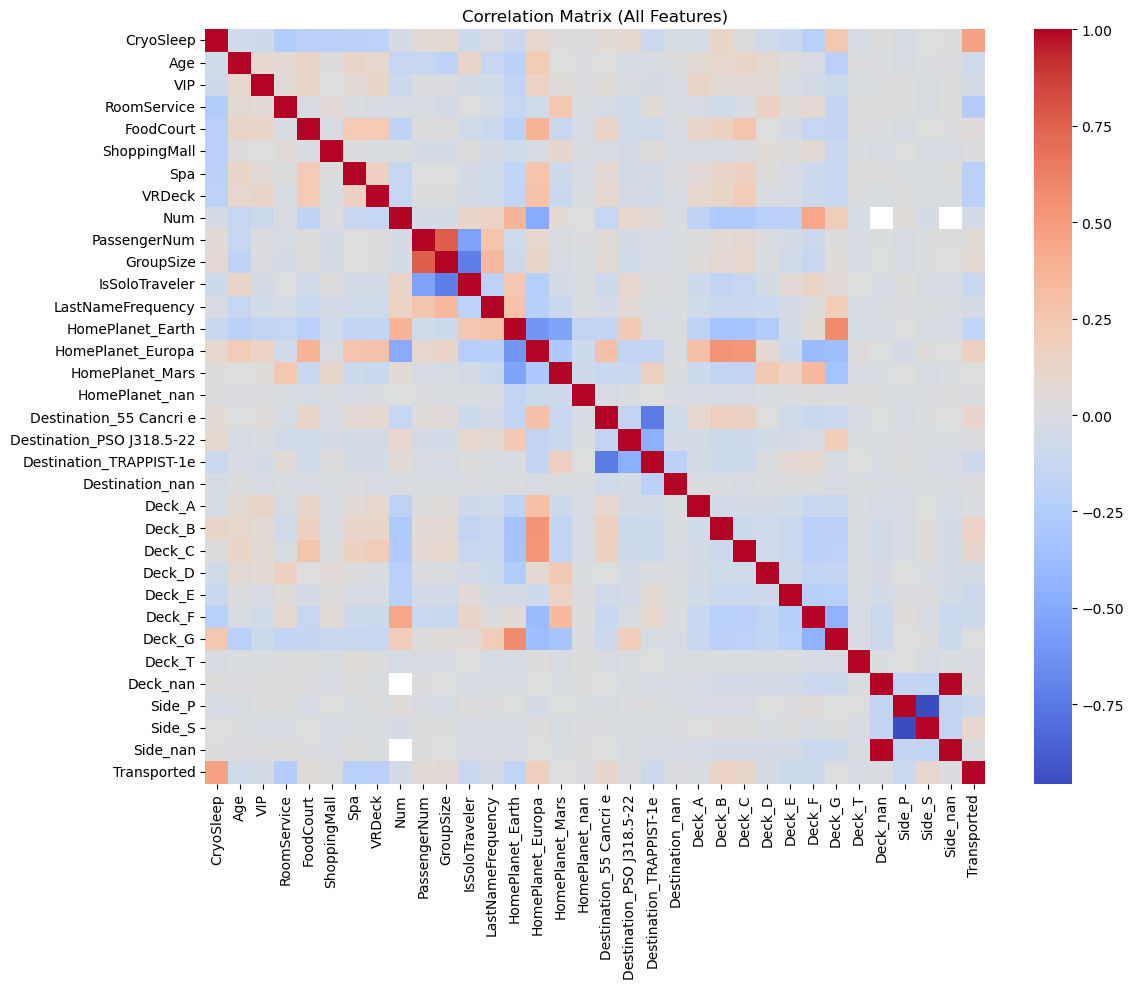

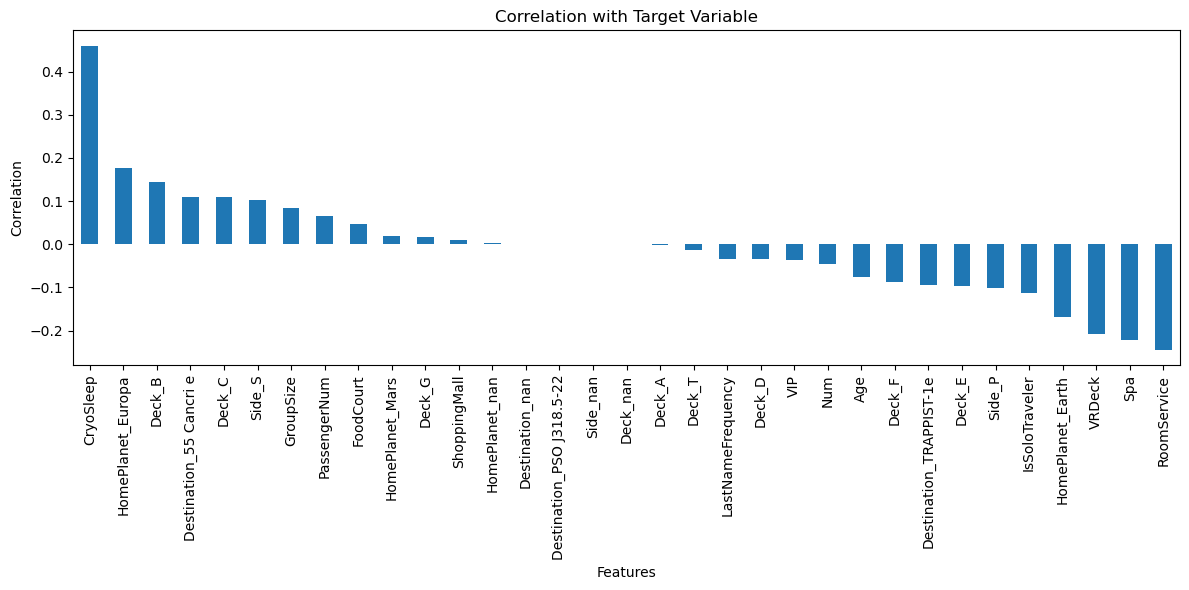

Top 10 correlations with target variable:
CryoSleep                  0.460132
RoomService                0.244611
Spa                        0.221131
VRDeck                     0.207075
HomePlanet_Europa          0.176916
HomePlanet_Earth           0.169019
Deck_B                     0.144733
IsSoloTraveler             0.113792
Destination_55 Cancri e    0.108722
Deck_C                     0.108193
Name: Transported, dtype: float64


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine encoded features with target variable
train_data_encoded = pd.concat([X_train_encoded, y_train], axis=1)

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_data_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (All Features)')
plt.tight_layout()
plt.show()

# Correlation with target variable
corr_target = train_data_encoded.corr()[y_train.name].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
corr_target.drop(y_train.name).plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

# Print top 10 correlations
print("Top 10 correlations with target variable:")
print(corr_target.drop(y_train.name).abs().sort_values(ascending=False).head(10))

#### Scale & Impute Missing Numeric Values

In [161]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create the scaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_encoded)

# Scale the training and test data
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Create the KNNImputer object
imputer = KNNImputer(n_neighbors=20)

# Fit the imputer on the scaled training data
imputer.fit(X_train_scaled)

# Impute missing values in the scaled training and test data
X_train_imputed = imputer.transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Check for missing values in datasets
train_missing = X_train_imputed_df.isnull().sum()
print("Missing values in training set after imputation:")
print(train_missing)
print(f"Total missing values in training set: {train_missing.sum()}")

test_missing = X_test_imputed_df.isnull().sum()
print("\nMissing values in test set after imputation:")
print(test_missing)
print(f"Total missing values in test set: {test_missing.sum()}")

# Verify that there are no NaN or infinite values
print("\nAny NaN values in training set:", np.isnan(X_train_imputed).any())
print("Any infinite values in training set:", np.isinf(X_train_imputed).any())
print("Any NaN values in test set:", np.isnan(X_test_imputed).any())
print("Any infinite values in test set:", np.isinf(X_test_imputed).any())

Missing values in training set after imputation:
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Num                          0
PassengerNum                 0
GroupSize                    0
IsSoloTraveler               0
LastNameFrequency            0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_nan               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Destination_nan              0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Deck_nan                     0
Side_P               

## Models

In [162]:
# Final datasets to be used
X_train_final = X_train_imputed
y_train_final  = y_train
X_test_final = X_test_imputed

print(y_train_final.head())

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


#### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Assuming X_train_final and y_train_final are already defined and properly formatted

# Define the expanded hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000, 2000],
}

# Add elasticnet penalty with l1_ratio
elasticnet_param = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # only saga supports elasticnet
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000, 2000],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# Combine the two parameter grids
from sklearn.model_selection import ParameterGrid
param_grid = list(ParameterGrid(param_grid)) + list(ParameterGrid(elasticnet_param))

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train_final)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train_final, y_train_final, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

# Train the best model on the entire training set
best_model.fit(X_train_final, y_train_final)

# The best model is now ready for predictions on new data

TypeError: Parameter grid for parameter 'C' needs to be a list or a numpy array, but got 0.001 (of type float) instead. Single values need to be wrapped in a list with one element.

## Predictions